In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
csv_file_path = r"F:\Ineuron\Fast Track\Machine_learning_Project\housing\artifact\data_ingestion\2023-02-02-19-15-30\ingested_data\train\housing.csv"
housing_data_frame = pd.read_csv(csv_file_path)

In [4]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


<AxesSubplot:ylabel='Frequency'>

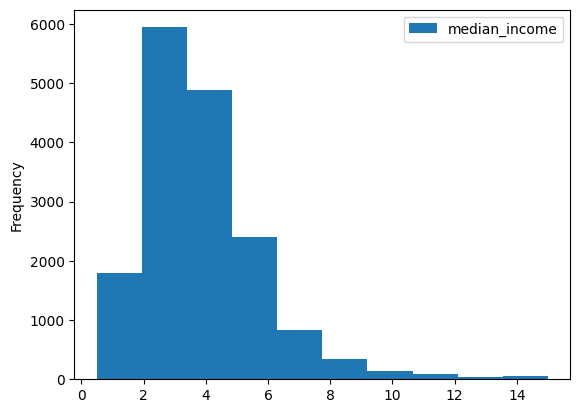

In [5]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [6]:
import numpy as np

In [7]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins = [0.0,1.5,3.0,4.5,6.0,np.inf],
                labels=[1,2,3,4,5])

In [8]:
housing_data_frame["income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

([<matplotlib.patches.Wedge at 0x1d91a6be518>,
 [Text(0.49756121587357405, 0.9810366132099305, '3'),
  Text(-1.0978194027893744, -0.06922830966578182, '2'),
  Text(0.0525111343279255, -1.098745912743977, '4'),
  Text(0.9018667992507281, -0.6297906607828089, '5'),
  Text(1.091417214754359, -0.13714395115293113, '1')])

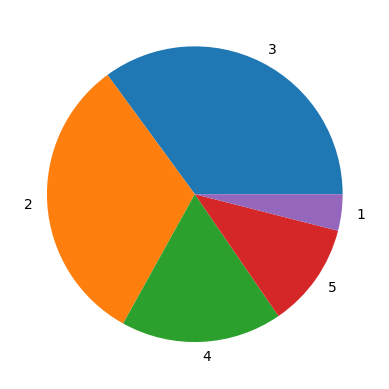

In [9]:
plt.pie(housing_data_frame["income_cat"].value_counts(),labels=housing_data_frame["income_cat"].value_counts().index)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [12]:
for train_index, test_index in split.split(housing_data_frame,housing_data_frame["income_cat"]):
    print(train_index,test_index)

[16060 15339    17 ...  6713 12794  1913] [ 3012  6966 13328 ... 13662  1795 14256]


In [13]:
train_df = housing_data_frame.loc[train_index]

In [14]:
train_df["income_cat"].value_counts()

3    4631
2    4212
4    2329
5    1512
1     525
Name: income_cat, dtype: int64

<AxesSubplot:ylabel='Frequency'>

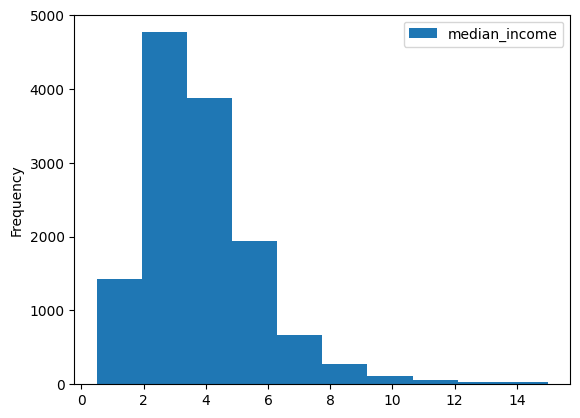

In [15]:
train_df[["median_income"]].plot(kind="hist")

In [16]:
test_df = housing_data_frame.loc[test_index]

In [17]:
test_df["income_cat"].value_counts()

3    1158
2    1053
4     582
5     378
1     132
Name: income_cat, dtype: int64

<AxesSubplot:ylabel='Frequency'>

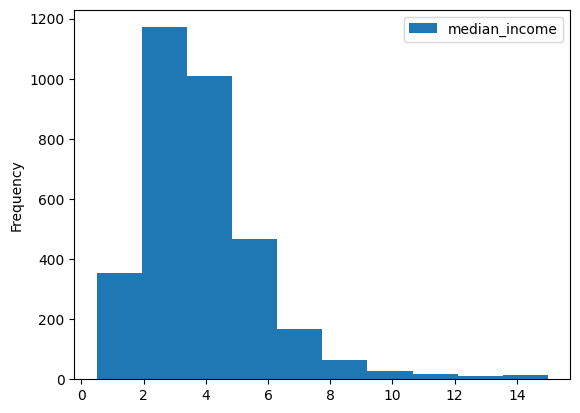

In [18]:
test_df[["median_income"]].plot(kind="hist")

In [23]:
housing_data_frame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [24]:
housing_data_frame.dtypes.index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [25]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [28]:
data_type = list(map(lambda x:str(x).replace("dtype(","").replace(")",""),housing_data_frame.dtypes.values))

In [34]:
data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [32]:
column = housing_data_frame.columns

In [35]:
column

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [36]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}